In [1]:
import time
from pandas.api.types import union_categoricals
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir("../Sup_Fig_S1")

In [3]:
def concatenate(dfs):
    """Concatenate while preserving categorical columns.

    NB: We change the categories in-place for the input dataframes"""
    # Iterate on categorical columns common to all dfs
    for col in set.intersection(
        *[
            set(df.select_dtypes(include='category').columns)
            for df in dfs
        ]
    ):
        # Generate the union category across dfs for this column
        uc = union_categoricals([df[col] for df in dfs])
        # Change to union category for all dataframes
        for df in dfs:
            df[col] = pd.Categorical(df[col].values, categories=uc.categories)
    return pd.concat(dfs, ignore_index=True)

In [4]:
targets = [
    'Annelida',
    'Arthropoda',
    'Chordata',
    'Cnidaria',
    'Echinodermata',
    'Mollusca',
    'Nematoda',
    'Platyhelminthes',
]
nseqs = {
    'Annelida': '1,110',
    'Arthropoda': '88,440',
    'Chordata': '14,170',
    'Cnidaria': '410',
    'Echinodermata': '720',
    'Mollusca': '6,170',
    'Nematoda': '570',
    'Platyhelminthes': '450',
}

In [5]:
suffix = 'subsample'
tmp = []
for phylum in targets:
    stime = time.time()
    print(phylum),
    subdf = pd.read_csv(f"{phylum}.{suffix}.m6", sep='\t', dtype={"identity": "float16", "LCA": "category", "phylum": "category"})
    etime = time.time()
    print(f"...({etime-stime:.3f} secs)")
    tmp.append(subdf)
    
print("Concatenating")
stime = time.time()
df = concatenate(tmp)
df['phylum'] = df['phylum'].astype("category")
etime = time.time()
print(f"...({etime-stime:.3f} secs)")
df.info(memory_usage='deep')

del subdf
del tmp

Annelida
...(0.180 secs)
Arthropoda
...(31.536 secs)
Chordata
...(5.166 secs)
Cnidaria
...(0.024 secs)
Echinodermata
...(0.082 secs)
Mollusca
...(3.233 secs)
Nematoda
...(0.038 secs)
Platyhelminthes
...(0.028 secs)
Concatenating
...(3.750 secs)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186894952 entries, 0 to 186894951
Data columns (total 3 columns):
 #   Column    Dtype   
---  ------    -----   
 0   identity  float16 
 1   LCA       category
 2   phylum    category
dtypes: category(2), float16(1)
memory usage: 712.9 MB


phylum
...(60.282 secs)
class
...(144.957 secs)
order
...(238.201 secs)
family
...(194.596 secs)
genus
...(11.942 secs)
species


/tmp/ipykernel_2084290/27488495.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{p}\n({nseqs[p]})" for p in targets])


...(3.263 secs)


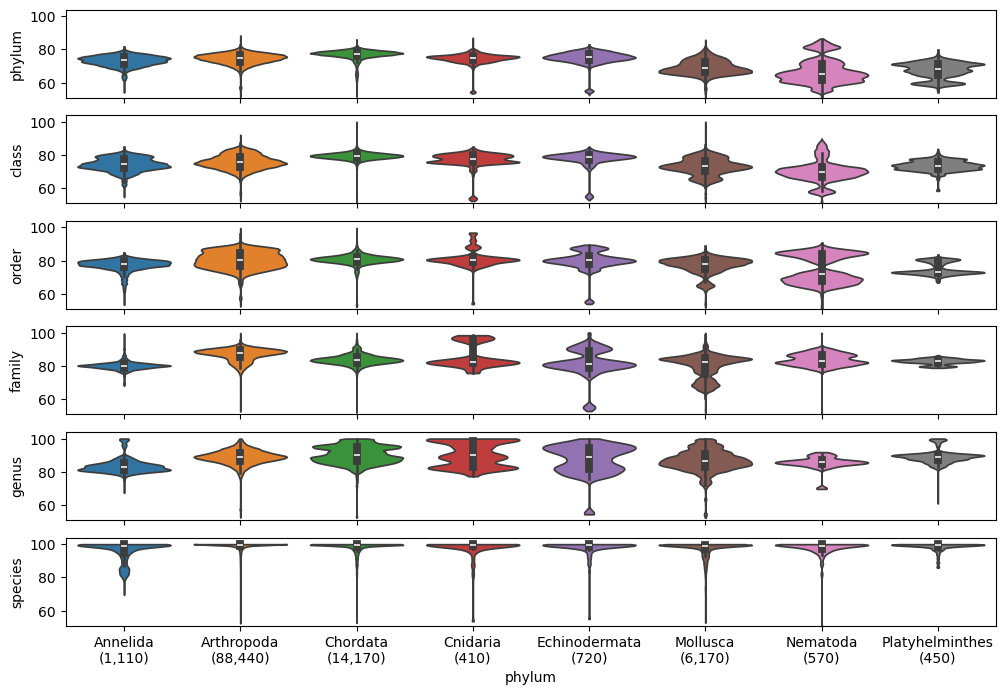

In [6]:
fig, axes = plt.subplots(6, 1, figsize=(12, 8), sharex=True)
for i, rank in enumerate(['phylum', 'class', 'order', 'family', 'genus', 'species']):
    stime = time.time()
    print(rank)
    ax = sns.violinplot(data=df.query("LCA == @rank"),
                       x='phylum', y='identity', hue='phylum',
                       order=targets, ax=axes[i],
                       cut=0)
    ax.set_ylabel(rank)
    ax.set_ylim((51, 104))
    if rank == 'species':
        ax.set_xticklabels([f"{p}\n({nseqs[p]})" for p in targets])
    etime = time.time()
    print(f"...({etime-stime:.3f} secs)")

In [7]:
fig.savefig("../../Figures/Sup_Fig_S1.pdf", format='pdf', bbox_inches='tight')